<hr/>

# Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 16** - October 31, 2016

- Clustering problems
- $k$-means clustering
- Voronoi tesselation

<hr/>

<h1><font color="darkblue">Clustering</font></h1>

## Statistical Learning

- The methods in general fall in these 4 categories

>|                | Supervised     |         Unsupervised     |
 |:---------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |



## Clustering is ...

... the process of collecting a set of objects into groups or clusters of similar items

####For example,

- Discover different species of birds based on their photographs
- Segment an image based on the pixel colors
- Organize news articles that cover the same story

<img src=http://www.codeproject.com/KB/recipes/439890/clustering-process.png width=450 align=left>

Populating the interactive namespace from numpy and matplotlib


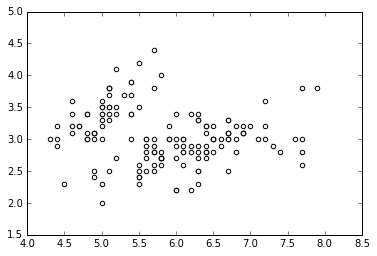

In [9]:
%pylab inline
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2] 
# only the first 2 features

scatter(X[:,0],X[:,1],c='w');   #c=color

## Types of Algorithms

- Flat

>0. Start with a random partitioning
>0. Iterate to improve the grouping

- Hierarchical

>0. Greedy grouping of closest: bottom up
>0. Greedy splitting of farthest: top down

### Flat example

<img src=http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif  align=left width=300>

### Hierarchical example

> Set

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Clusters.svg/250px-Clusters.svg.png width=150 align=center>

> Dendogram

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/418px-Hierarchical_clustering_simple_diagram.svg.png width=250>

## $k$-means clustering

A simple (flat) algorithm


### Optimization

- Formally, it's an optimization over the possible groupings of objects

> For a set of $\{ x_l \}$ where $x_l\in \mathbb{R}^d$ for all $l$

>$\displaystyle  \hat{\boldsymbol{C}} = \textrm{arg}\min_{\boldsymbol{C}} \sum_{i=1}^k \left[\ \sum_{x\in{}C_i}\ |\!|x-\mu_i|\!|^2 \right] $

> where 

>$\displaystyle  \mu_i = \frac{1}{|C_i|}\sum_{x\in{}C_i} x $

### Algorithm

- Iteratively improving the $\mu_i$ **prototypes** of $k$ clusters

>0. Pick $k$ random objects as the initial $\mu_i$ prototypes
>0. Find for each object the closest prototype and assign to that cluster
>0. Calculate the averages for each cluster to get new $\mu_i$
>0. Repeat until convergence

- Often very fast - but no proof

### Animation

<img src=http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif align=left width=300>

- Click on these <a href=http://shabal.in/visuals/kmeans/1.html>animations</a> to see the process of $k$-means clustering in action
 
> Starting from different points...

In [2]:
figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(X[:,0],X[:,1],c='w');

NameError: name 'figure' is not defined

array([[ 6.61044776,  2.96567164],
       [ 5.22409639,  3.1253012 ]])

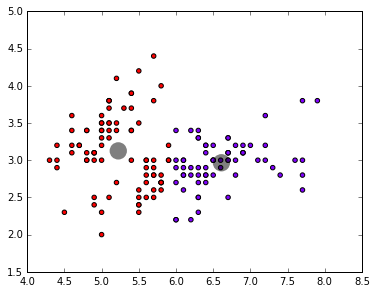

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='random', n_clusters=2, n_init=100) #初始化模块,随机中心点
kmeans.fit(X) #训练模块

figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap=cm.rainbow); #c区分颜色,cmap指定颜色范围

C = kmeans.cluster_centers_#集群均值点坐标
scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none'); #每列都是一个点坐标（x,y）

array([[ 1.5  ,  1.5  ,  1.5  , ...,  1.5  ,  1.5  ,  1.5  ],
       [ 1.505,  1.505,  1.505, ...,  1.505,  1.505,  1.505],
       [ 1.51 ,  1.51 ,  1.51 , ...,  1.51 ,  1.51 ,  1.51 ],
       ..., 
       [ 4.89 ,  4.89 ,  4.89 , ...,  4.89 ,  4.89 ,  4.89 ],
       [ 4.895,  4.895,  4.895, ...,  4.895,  4.895,  4.895],
       [ 4.9  ,  4.9  ,  4.9  , ...,  4.9  ,  4.9  ,  4.9  ]])

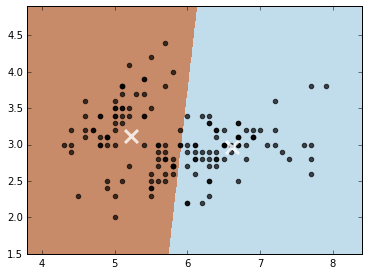

In [17]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .005    # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() -.5, X[:, 0].max() +.5
y_min, y_max = X[:, 1].min() -.5, X[:, 1].max() +.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
P = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
P = P.reshape(xx.shape)
figure(figsize=(6,6)); subplot(111,aspect='equal')
plt.clf()

plt.imshow(P, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='equal', origin='lower', alpha=0.7)

plt.scatter(X[:, 0], X[:, 1], c='k', alpha=0.7)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10, alpha=0.8)

plt.xlim(x_min, x_max);
plt.ylim(y_min, y_max);

## Detour: Voronoi Tessellation & Delaunay Triangulation

<img src=http://christophermanning.org/images/2012/12/59dfbaa41a678cd39a4cc5b94ab8919740e51d9c.png align=left width=600>

## Limitations

- Initialization matters

> Rerun multiple times: **n_init** (default=10) <br/>
> Smart(er) starting points

- Assumes spherical clusters (use of distance function)

> Preprocessing becomes important even in simple cases <br>
> For example, whitening...

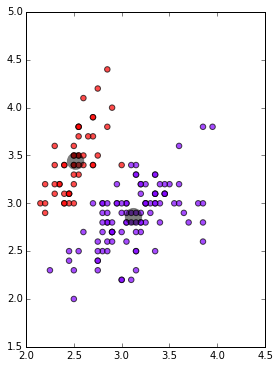

In [46]:
# transformations might help
X[:,0] *= 0.5

kmeans = KMeans(n_clusters=2,n_init=100,init='k-means++')#smarter starting points
kmeans.fit(X)
C, L = kmeans.cluster_centers_, kmeans.labels_

figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(X[:,0],X[:,1],c= L, marker='o',s= 30,alpha=0.7,cmap=cm.rainbow);
scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

## So This Won't Work!

<img src=http://www.squobble.com/academic/ftvmimo/spiral_A.png width=250 align=left>

## What $k$?

- How many clusters?

> Too many? <br/>
> Too few?

- Various diagnostics

> Check the minimum value of the cost function? <br/>
> Characterize the clusters - Gaussian? spherical?



## Exercise

- Run $k$-means on this [CSV](files/Class18-Clusters.csv) file
- Try different parameters
- How many clusters did you find?

(200L, 3L)


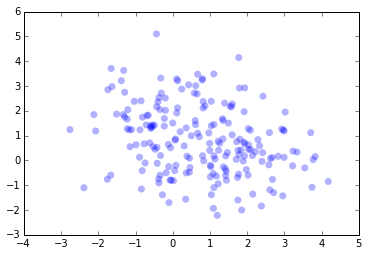

In [47]:
X = loadtxt('files/Class18-Clusters.csv', delimiter=',')
print X.shape
scatter(X[:,0],X[:,1],s=50,alpha=0.3,edgecolor='none');

## $k$-medians clustering

Replace mean with median for cluster centers
